# Importing Library

In [1]:
# Importing Library that we need 
import math
import statistics
import numpy as np
import scipy.stats
import statsmodels.api as sm
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#  Load and Getting Basic Info About the Dataset

In [2]:
# Load and see the top 5 rows of the dataset
df = pd.read_csv('data/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# getting basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

BOROUGH has a digit code that represent the property is located in, in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

# Data Preparation

In [4]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
# drop the Unnamed:0 and EASE-MENT column as it has no used and has a lot null value
df = df.drop(columns=['Unnamed: 0', 'EASE-MENT'], axis=1)

In [6]:
# change the data type format of some columns

num_type = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']

for i in num_type:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [7]:
# checking the missing value
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [8]:
# Fill in the missing value from one column to another

df['LAND SQUARE FEET'].fillna(df['GROSS SQUARE FEET'], inplace=True)
df['GROSS SQUARE FEET'].fillna(df['LAND SQUARE FEET'], inplace=True)

In [9]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26246
GROSS SQUARE FEET                 26246
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [10]:
# filtering data that's not null, because we just need the data that has not null value

df = df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].notnull()) & (df['SALE PRICE'].notnull())]

In [11]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [12]:
# check data duplicate
df.duplicated().sum()

350

In [13]:
# drop the data duplicate
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

# Measure of Central Tendency

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48453 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         48453 non-null  int64         
 1   NEIGHBORHOOD                    48453 non-null  object        
 2   BUILDING CLASS CATEGORY         48453 non-null  object        
 3   TAX CLASS AT PRESENT            48453 non-null  object        
 4   BLOCK                           48453 non-null  int64         
 5   LOT                             48453 non-null  int64         
 6   BUILDING CLASS AT PRESENT       48453 non-null  object        
 7   ADDRESS                         48453 non-null  object        
 8   APARTMENT NUMBER                48453 non-null  object        
 9   ZIP CODE                        48453 non-null  int64         
 10  RESIDENTIAL UNITS               48453 non-null  int64         
 11  CO

## Mean

In [16]:
# calculating mean of Residential Units, Commercial Units, Total Units, Land sq ft, Gross sq ft, and also Sale Price.

print('Mean of :')

res_units = df['RESIDENTIAL UNITS'].mean()
print(' - Residential Units = ', round(res_units, 2))

comm_units = df['COMMERCIAL UNITS'].mean()
print(' - Commercial Units = ', round(comm_units, 2))

tot_units = df['TOTAL UNITS'].mean()
print(' - Total Units = ', round(tot_units, 2))

land_sqft = df['LAND SQUARE FEET'].mean()
print(' - Land Square Feet = ', round(land_sqft, 2))

gross_sqft = df['GROSS SQUARE FEET'].mean()
print(' - Gross Square Feet = ', round(gross_sqft, 2))

sale_price = df['SALE PRICE'].mean()
print(' - Sale Price = ', round(sale_price, 2))

Mean of :
 - Residential Units =  2.52
 - Commercial Units =  0.24
 - Total Units =  2.77
 - Land Square Feet =  3547.6
 - Gross Square Feet =  3799.64
 - Sale Price =  1180256.23


In [17]:
# calculating mean of Sale Price per Borough

## BOROUGH has a digit code that represent the property is located in,
## in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

print('Mean of Sale Price per Borough')

man_mean = df[df['BOROUGH'] == 1]['SALE PRICE'].mean()
print(' - Manhattan : ', round(man_mean, 2))

bx_mean = df[df['BOROUGH'] == 2]['SALE PRICE'].mean()
print(' - Bronx : ', round(bx_mean, 2))

brok_mean = df[df['BOROUGH'] == 3]['SALE PRICE'].mean()
print(' - Brooklyn : ', round(brok_mean, 2))

quen_mean = df[df['BOROUGH'] == 4]['SALE PRICE'].mean()
print(' - Queens : ', round(quen_mean, 2))

stil_mean = df[df['BOROUGH'] == 5]['SALE PRICE'].mean()
print(' - State Island : ', round(stil_mean, 2))

Mean of Sale Price per Borough
 - Manhattan :  19104022.33
 - Bronx :  594677.12
 - Brooklyn :  841083.4
 - Queens :  935756.61
 - State Island :  575201.21


In [18]:
# calculating mean of Land Square Feet and Gross Square Feet per Borough

## BOROUGH has a digit code that represent the property is located in,
## in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

print('Mean of Land Square Feet per Borough :')

man_mean_lfs = df[df['BOROUGH'] == 1]['LAND SQUARE FEET'].mean()
print(' - Manhattan : ', round(man_mean_lfs, 2))

bx_mean_lfs = df[df['BOROUGH'] == 2]['LAND SQUARE FEET'].mean()
print(' - Bronx : ', round(bx_mean_lfs, 2))

brok_mean_lfs = df[df['BOROUGH'] == 3]['LAND SQUARE FEET'].mean()
print(' - Brooklyn : ', round(brok_mean_lfs, 2))

quen_mean_lfs = df[df['BOROUGH'] == 4]['LAND SQUARE FEET'].mean()
print(' - Queens : ', round(quen_mean_lfs, 2))

stil_mean_lfs = df[df['BOROUGH'] == 5]['LAND SQUARE FEET'].mean()
print(' - State Island : ', round(stil_mean_lfs, 2))



print('\nMean of Gross Square Feet per Borough :')

man_mean_gfs = df[df['BOROUGH'] == 1]['GROSS SQUARE FEET'].mean()
print(' - Manhattan : ', round(man_mean_gfs, 2))

bx_mean_gfs = df[df['BOROUGH'] == 2]['GROSS SQUARE FEET'].mean()
print(' - Bronx : ', round(bx_mean_gfs, 2))

brok_mean_gfs = df[df['BOROUGH'] == 3]['GROSS SQUARE FEET'].mean()
print(' - Brooklyn : ', round(brok_mean_gfs, 2))

quen_mean_gfs = df[df['BOROUGH'] == 4]['GROSS SQUARE FEET'].mean()
print(' - Queens : ', round(quen_mean_gfs, 2))

stil_mean_gfs = df[df['BOROUGH'] == 5]['GROSS SQUARE FEET'].mean()
print(' - State Island : ', round(stil_mean_gfs, 2))

Mean of Land Square Feet per Borough :
 - Manhattan :  5844.2
 - Bronx :  3909.01
 - Brooklyn :  2016.06
 - Queens :  4006.23
 - State Island :  8534.15

Mean of Gross Square Feet per Borough :
 - Manhattan :  34013.89
 - Bronx :  4489.15
 - Brooklyn :  2481.76
 - Queens :  2992.09
 - State Island :  4762.13


## Median

In [19]:
# calculating median of Residential Units, Commercial Units, Total Units, Land sq ft, Gross sq ft, and also Sale Price.

print('Median of :')

res_units_med = df['RESIDENTIAL UNITS'].median()
print(' - Residential Units = ', round(res_units_med, 2))

comm_units_med = df['COMMERCIAL UNITS'].median()
print(' - Commercial Units = ', round(comm_units_med, 2))

tot_units_med = df['TOTAL UNITS'].median()
print(' - Total Units = ', round(tot_units_med, 2))

land_sqft_med = df['LAND SQUARE FEET'].median()
print(' - Land Square Feet = ', round(land_sqft_med, 2))

gross_sqft_med = df['GROSS SQUARE FEET'].median()
print(' - Gross Square Feet = ', round(gross_sqft_med, 2))

sale_price_med = df['SALE PRICE'].median()
print(' - Sale Price = ', round(sale_price_med, 2))

Median of :
 - Residential Units =  1.0
 - Commercial Units =  0.0
 - Total Units =  1.0
 - Land Square Feet =  2150.0
 - Gross Square Feet =  1632.0
 - Sale Price =  485000.0


In [20]:
# calculating Sale Price's median per Borough

## BOROUGH has a digit code that represent the property is located in,
## in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

print('Sale Price per Borough')

man_med = df[df['BOROUGH'] == 1]['SALE PRICE'].median()
print(' - Manhattan : ', round(man_med, 2))

bx_med = df[df['BOROUGH'] == 2]['SALE PRICE'].median()
print(' - Bronx : ', round(bx_med, 2))

brok_med = df[df['BOROUGH'] == 3]['SALE PRICE'].median()
print(' - Brooklyn : ', round(brok_med, 2))

quen_med = df[df['BOROUGH'] == 4]['SALE PRICE'].median()
print(' - Queens : ', round(quen_med, 2))

stil_med = df[df['BOROUGH'] == 5]['SALE PRICE'].median()
print(' - State Island : ', round(stil_med, 2))

Sale Price per Borough
 - Manhattan :  6500000.0
 - Bronx :  274897.0
 - Brooklyn :  425605.0
 - Queens :  630000.0
 - State Island :  484000.0


## Modus

In [21]:
# getting Neighborhood mode in each Borough


print('Mode of Neighborhood per Borough :')

man_mod = df[df['BOROUGH'] == 1]['NEIGHBORHOOD'].mode()
print(' - Manhattan : ', man_mod.values)

bx_mod = df[df['BOROUGH'] == 2]['NEIGHBORHOOD'].mode()
print(' - Bronx : ', bx_mod.values)

brok_mod = df[df['BOROUGH'] == 3]['NEIGHBORHOOD'].mode()
print(' - Brooklyn : ', brok_mod.values)

quen_mod = df[df['BOROUGH'] == 4]['NEIGHBORHOOD'].mode()
print(' - Queens : ', quen_mod.values)

stil_mod = df[df['BOROUGH'] == 5]['NEIGHBORHOOD'].mode()
print(' - State Island : ', stil_mod.values)

Mode of Neighborhood per Borough :
 - Manhattan :  ['HARLEM-CENTRAL']
 - Bronx :  ['RIVERDALE']
 - Brooklyn :  ['BEDFORD STUYVESANT']
 - Queens :  ['FLUSHING-NORTH']
 - State Island :  ['GREAT KILLS']


In [22]:
# getting Mode of some columns

## BOROUGH has a digit code that represent the property is located in,
## in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

print('Mode of some columns :')

bor_mod = df['BOROUGH'].mode()
print(' - Borough : ', bor_mod.values)

nh_mod = df['NEIGHBORHOOD'].mode()
print(' - Neighborhood : ', nh_mod.values)

bcc_mod = df['BUILDING CLASS CATEGORY'].mode()
print(' - Building Class Category : ', bcc_mod.values)

bcap_mod = df['BUILDING CLASS AT PRESENT'].mode()
print(' - Building Class at Present : ', bcap_mod.values)

year_mod = df['YEAR BUILT'].mode()
print(' - Year Built : ', year_mod.values)

bcas_mod = df['BUILDING CLASS AT TIME OF SALE'].mode()
print(' - Building Class at time of sale : ', bcas_mod.values)

Mode of some columns :
 - Borough :  [3]
 - Neighborhood :  ['BEDFORD STUYVESANT']
 - Building Class Category :  ['01 ONE FAMILY DWELLINGS                    ']
 - Building Class at Present :  ['A1']
 - Year Built :  [1920]
 - Building Class at time of sale :  ['A1']


# Measure of Spread

## Variance

In [23]:
# calculating variance of some numeric columns

print('Variance of :')

var_res_units = df['RESIDENTIAL UNITS'].var(ddof=1)
print(' - Residential Units = ', round(var_res_units, 2))

var_comm_units = df['COMMERCIAL UNITS'].var(ddof=1)
print(' - Commercial Units = ', round(var_comm_units, 2))

var_tot_units = df['TOTAL UNITS'].var(ddof=1)
print(' - Total Units = ', round(var_tot_units, 2))

var_land_sqft = df['LAND SQUARE FEET'].var(ddof=1)
print(' - Land Square Feet = ', round(var_land_sqft, 2))

var_gross_sqft = df['GROSS SQUARE FEET'].var(ddof=1)
print(' - Gross Square Feet = ', round(var_gross_sqft, 2))

var_sale_price = df['SALE PRICE'].var(ddof=1)
print(' - Sale Price = ', round(var_sale_price, 2))

Variance of :
 - Residential Units =  291.96
 - Commercial Units =  116.28
 - Total Units =  413.05
 - Land Square Feet =  1579139015.9
 - Gross Square Feet =  1499569322.63
 - Sale Price =  180605546136479.6


##  Standard Deviation

In [24]:
# calculating standard deviation of some numeric columns

print('Standard deviation of :')

std_res_units = df['RESIDENTIAL UNITS'].std(ddof=1)
print(' - Residential Units = ', round(std_res_units, 2))

std_comm_units = df['COMMERCIAL UNITS'].std(ddof=1)
print(' - Commercial Units = ', round(std_comm_units, 2))

std_tot_units = df['TOTAL UNITS'].std(ddof=1)
print(' - Total Units = ', round(std_tot_units, 2))

std_land_sqft = df['LAND SQUARE FEET'].std(ddof=1)
print(' - Land Square Feet = ', round(std_land_sqft, 2))

std_gross_sqft = df['GROSS SQUARE FEET'].std(ddof=1)
print(' - Gross Square Feet = ', round(std_gross_sqft, 2))

std_sale_price = df['SALE PRICE'].std(ddof=1)
print(' - Sale Price = ', round(std_sale_price, 2))

Standard deviation of :
 - Residential Units =  17.09
 - Commercial Units =  10.78
 - Total Units =  20.32
 - Land Square Feet =  39738.38
 - Gross Square Feet =  38724.27
 - Sale Price =  13438956.29


## Range

In [25]:
# calculating range of Sale Price, Land Square Feet, and Gross Square Feet

sp_range = np.ptp(df['SALE PRICE'])
lsf_range = np.ptp(df['LAND SQUARE FEET'])
gsf_range = np.ptp(df['GROSS SQUARE FEET'])

print('Range of :')
print(' - Sale Price : ', sp_range)
print(' - Land Square Feet : ', lsf_range)
print(' - Gross Square Feet :', gsf_range)

Range of :
 - Sale Price :  2210000000.0
 - Land Square Feet :  4252327.0
 - Gross Square Feet : 4252327.0


In [26]:
# calculating range of Sale Price per Borough

print('Range of Sale Price per Borough :')

sp_man_range = np.ptp(df[df['BOROUGH'] == 1]['SALE PRICE'])
print(' - Manhattan : ', sp_man_range)

sp_bx_range = np.ptp(df[df['BOROUGH'] == 2]['SALE PRICE'])
print(' - Bronx : ', sp_bx_range)

sp_brk_range = np.ptp(df[df['BOROUGH'] == 3]['SALE PRICE'])
print(' - Brooklyn : ', sp_brk_range)

sp_qn_range = np.ptp(df[df['BOROUGH'] == 4]['SALE PRICE'])
print(' - Queens : ', sp_qn_range)

sp_si_range = np.ptp(df[df['BOROUGH'] == 5]['SALE PRICE'])
print(' - State Island : ', sp_si_range)

Range of Sale Price per Borough :
 - Manhattan :  2209999999.0
 - Bronx :  110000000.0
 - Brooklyn :  345000000.0
 - Queens :  257499999.0
 - State Island :  121999999.0


# Probability Distribution

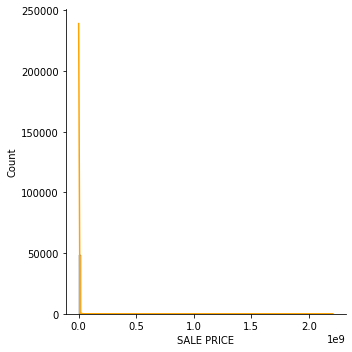

In [27]:
sb.displot(df['SALE PRICE'], bins=100, kde=True, color='orange')

In [28]:
df_new = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

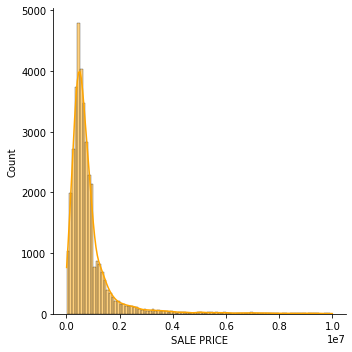

In [29]:
sb.displot(df_new['SALE PRICE'], bins=100, kde=True, color='orange')

In [30]:
df_new['LOG PRICE'] = np.log(df_new['SALE PRICE'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4992\2586534485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LOG PRICE'] = np.log(df_new['SALE PRICE'])


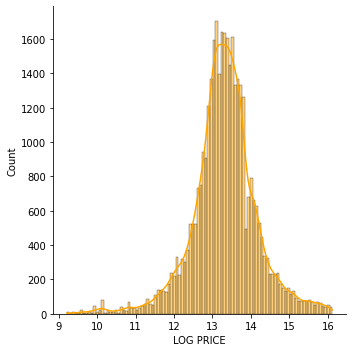

In [31]:
sb.displot(df_new['LOG PRICE'], bins=100, kde=True, color='orange')

As we can se on a plot, the probability distribution is close to normal (the skewness is close to 0 which means its almost symmetrical

# Confidence Interval

Calculating confidence interval for the **Queens** properties that has sale price > 1.000.000

*BOROUGH has a digit code that represent the property is located in,*
<br>
*in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).*

In [32]:
df_bsp = df[df['SALE PRICE'] != 0]
df_bsp.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [33]:
df_bsp.groupby("BOROUGH").aggregate({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        1.910402e+07  8.768322e+07   1013
2        8.047933e+05  3.223718e+06   5168
3        1.280830e+06  4.818740e+06  15657
4        9.357566e+05  4.084398e+06  11292
5        5.752012e+05  2.017233e+06   5311

In [34]:
mean_brook = 1.280830e+06
std_brook = 4.818740e+06
n_brook = 15657
z = 1.96

std_error_brook = std_brook / np.sqrt(15657)
print('Standard error of Sale Price in Borough 3 = ', std_error_brook)

Standard error of Sale Price in Borough 3 =  38510.50541240482


In [35]:
# construct the CI
lcb = mean_brook - z* std_error_brook  #lower limit of the CI
ucb = mean_brook + z* std_error_brook  #upper limit of the CI

print('lower limit of the CI = ', round(lcb, 3))
print('upper limit of the CI = ', round(ucb, 3))

lower limit of the CI =  1205349.409
upper limit of the CI =  1356310.591


That means the true mean of the Sale Price of Brooklyn is between 1205349.409 and 1356310.591

# Hypothesis Testing

##### Are property sales in Bronx higher than in Staten Island?

Null Hypothesis and Alternative Hypothesis

ho : Bronx property sales >= Staten Island property sales<br>
ha : Bronx property sales < Staten Island property sales

In [36]:
print('Average property sales in Bronx : ',round(bx_mean, 2))
print('Average property sales in Staten Island : ',round(stil_mean, 2))

Average property sales in Bronx :  594677.12
Average property sales in Staten Island :  575201.21


Average property sales in Bronx is higher than in Staten Island, But is it that significantly high?
<br>we can check it with calculating the ztest and get the p value

In [37]:
# getting data of Bronx and Staten Island
brx = df[df['BOROUGH'] == 2]
stil = df[df['BOROUGH'] == 5]

In [38]:
# calculating the ztest and getting the p value
sm.stats.ztest(brx["SALE PRICE"], stil["SALE PRICE"],alternative='two-sided')

(0.43002752294442487, 0.6671756203709707)